### Import Python Dependencies

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import os
from glob import glob

### Merging 12 months of sales data into a single csv file

In [155]:
filenames = glob('C:/Users/Azariah_2/Sales Data Analysis/Sales_Data/Sales*.csv')
dataframes = [pd.read_csv(f) for f in filenames]
sales= pd.concat(dataframes, ignore_index= True)

In [156]:
# Show the number of rows and columns
sales.shape

(186850, 6)

In [157]:
# Display the first five rows of data
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [158]:
# Display the last five rows of data
sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [159]:
# A brief summary of the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [160]:
# check out for null values in each columns
sales[sales.isna()][:5]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
# Add all null values in each columns
sales.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [162]:
# Drop null values
sales.dropna(how= 'all', inplace= True)

#confirm the removal of null values
sales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [163]:
# Convert column names to lower
sales.columns = sales.columns.str.lower().str.replace(" ", "_").str.strip()
sales.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [164]:
# Remove column names which are included in dataset during concatenation
sales = sales[sales["product"]!='Product']
#convert Data types
sales["order_date"] =pd.to_datetime(sales['order_date'])
sales["quantity_ordered"]= sales["quantity_ordered"].astype("int64")
sales["price_each"]= sales["price_each"].astype("float64")

In [165]:
sales.dtypes

order_id                    object
product                     object
quantity_ordered             int64
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

### What was the best month for sales? How much was earned that month?

In [166]:
# Create month column
sales['month']= sales.order_date.dt.month

# Calculate the total sales of each order
sales['total_sales'] = sales['quantity_ordered'] * sales['price_each']
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [167]:
# groupby month and dispaly total sales of each month
results = sales.groupby("month")["total_sales"].sum()#sort_values(ascending= False)
months = results.index
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
print(months)
print(month_list)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


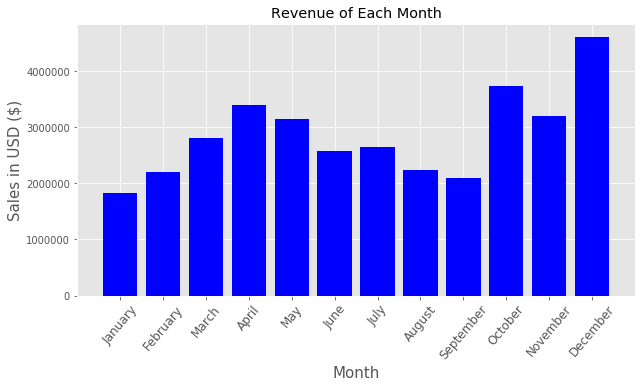

In [168]:
plt.figure(figsize=(10, 5))
plt.bar(months, results, color = "b")
plt.xlim(0, 13)
plt.xticks(months, month_list, rotation = 50, size = 12)
plt.ylabel('Sales in USD ($)', size= 15)
plt.xlabel("Month", size= 15)
plt.title("Revenue of Each Month");

### What city had the highest number of sales?

In [169]:
sales["city"]= sales["purchase_address"].str.split(',').str.get(1)
sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


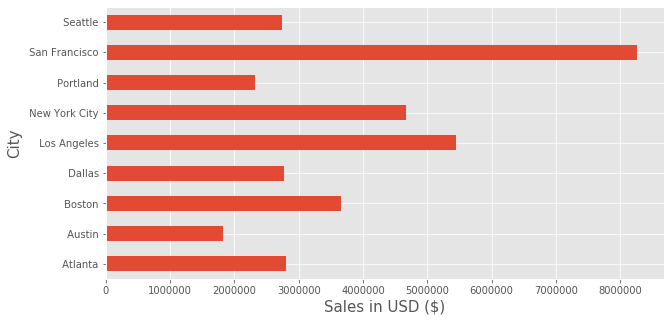

In [170]:
plt.figure(figsize=(10, 5))
sales.groupby("city")["total_sales"].sum().plot.barh()
plt.xlabel("Sales in USD ($)", size = 15)
plt.ylabel("City", size=15);

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [171]:
sales['hour'] = sales.order_date.dt.hour
sales.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14


In [172]:
sales.hour.unique()

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3], dtype=int64)

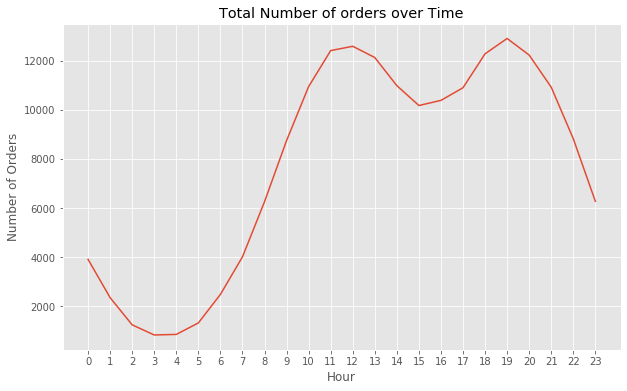

In [173]:
plt.figure(figsize= (10, 6))
hours = range(0, 24)
results = sales.groupby('hour')["hour"].count()
plt.plot(hours, results )
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.title("Total Number of orders over Time");

### What product sold the most? Why do you think it sold the most?


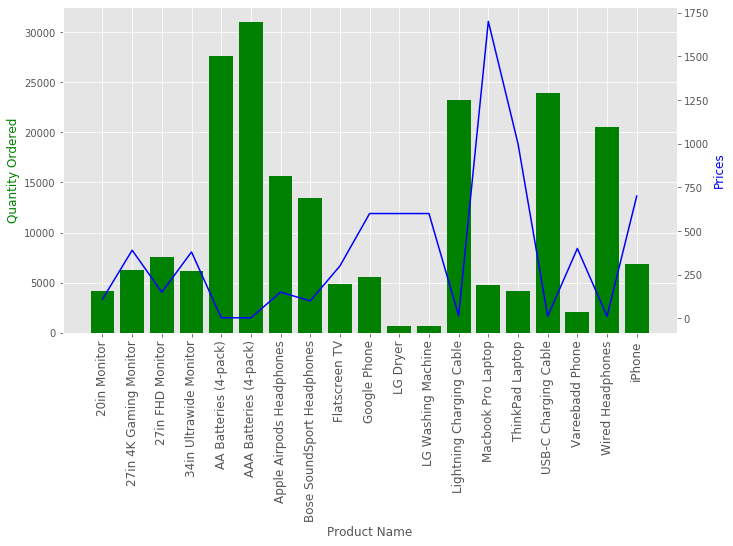

In [174]:
ordered_item = sales.groupby('product')["quantity_ordered"].sum()
prices = sales.groupby('product')['price_each'].mean()
product_name = ordered_item.index 

fig, ax1 =  plt.subplots(figsize= (11, 6))
ax2 = ax1.twinx()
ax1.bar(product_name, ordered_item,  color = 'g')
ax2.plot(product_name, prices,  color= 'b' )

ax1.set_xlabel("Product Name", size = 12)
ax1.set_ylabel("Quantity Ordered", color = 'g', size= 12 )
ax2.set_ylabel("Prices", color= 'b', size = 12)
ax1.set_xticklabels(product_name, rotation = 90, size = 12)

plt.grid(False);

# The customers prefer more lower priced items
# Negative correlation between Quantity ordered and the individual price of product